matplotlib-challenge
The Power of Plots 
April, 2020 
UCF Data Analytics

In [ ]:
Overall, it is clear that Ramicane and Capomulin 
regimens both reduce tumor growth.
Ramicane and Capomulin produced similar results across this analysis and 
both had roughly the same number of mice in their trials.

A strong correlation between mouse weight and tumor volume exists, 
indicating that mouse weight may be contributing to the efficacy of 
these two drug regimens.  

The Infubinol regimen produced an outlier. While most Infubinol 
treated mice showed tumor volume increase, one mouse did
have a reduction in tumor growth. 

In [1]:
# Importing and setting up dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Create a path for both csv files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both csv's data
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Merge two datasets into dataframes based upon 
# Mouse ID-return a sample df head
Pymarceuticals_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
Pymarceuticals_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# count the rows to see if anything is removed
Pymarceuticals_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# duplicates removed 'one row': 1893 rows to 1892
Pymarceuticals_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# create a summary table of mean, median, variance, standard deviation
# and SEM of the tumor volume for each drug regimen and all mice 
# outcomes included with remgimen
# Generate a summary statistics table of mean, median, 
# variance, standard deviation, and SEM of the tumor volume 
# for each regimen

means = Pymarceuticals_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = Pymarceuticals_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = Pymarceuticals_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = Pymarceuticals_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = Pymarceuticals_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Tumor Volume Mean":means,
                              "Tumor Volume Median":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


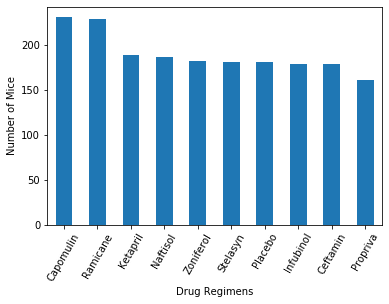

In [5]:
# Generate a bar plot using pandas; number of data points is 
# number of mice that used that drug
counts = Pymarceuticals_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimens")
plt.xticks(rotation=60)
plt.ylabel("Number of Mice")
plt.show()

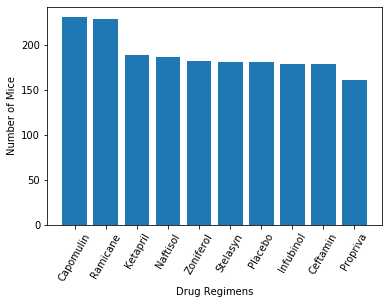

In [19]:
# Generate a bar plot using pyplot; number of data points is 
# number of mice that used that regimen
counts = Pymarceuticals_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimens")
plt.xticks(rotation=60)
plt.ylabel("Number of Mice")
plt.show()

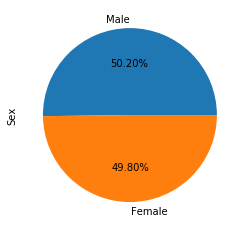

In [7]:
# Generate a pie plot showing female versus male 
# distribution of mice using pandas
counts = mouse_metadata.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.2f%%')
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

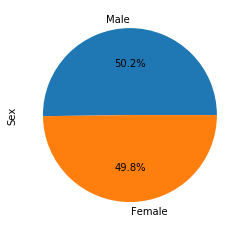

In [18]:
# Generate a pie plot showing female versus male 
# distribution of mice using pyplot
counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [9]:
# Prepare the data to find final tumor volume of each mouse for 4 of 
# the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, Ceftamin

# Find the largest timepoint for each mouse
maximum_tumor = Pymarceuticals_df.groupby(["Mouse ID"]).max()
maximum_tumor = maximum_tumor.reset_index()
# Merge group dataframe with the original dataframe to retrieve tumor volume
# at the last timepoint
merged_data = maximum_tumor[['Mouse ID', 'Timepoint', ]].merge(Pymarceuticals_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)'] 

In [10]:
# Quantitatively find the capomulin data outliers
capomulin_quartiles = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Capomulin outliers: {capomulin.loc[(capomulin < capomulin_lower_bound) | (capomulin > capomulin_upper_bound)]}")

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
# Quantitatively find the ramicane data outliers
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Ramicane outliers: {ramicane.loc[(ramicane < ramicane_lower_bound) | (ramicane > ramicane_upper_bound)]}")

Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [12]:
# Quantitatively find infubinol data outliers
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Infubinol outliers: {infubinol.loc[(infubinol < infubinol_lower_bound) | (infubinol > infubinol_upper_bound)]}")

Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [13]:
# Quantitatively find the ceftamin data outliers
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Ceftamin outliers: {ceftamin.loc[(ceftamin < ceftamin_lower_bound) | (ceftamin > ceftamin_upper_bound)]}")

Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


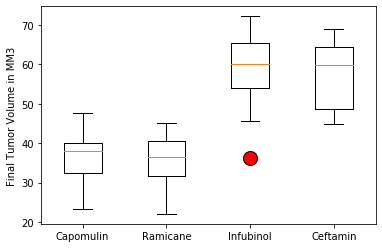

In [14]:
# Generate a box and whisker plot of the final tumor volume for the four 
# treatment regimens
red_square = dict(markerfacecolor='red',markersize=14)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=red_square)
plt.ylabel('Final Tumor Volume in MM3')
plt.show()

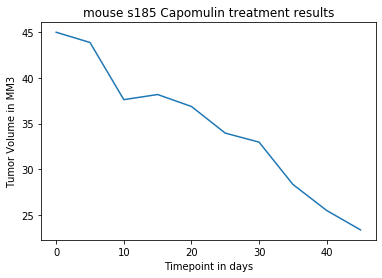

In [15]:
# Generate a line plot of timepoint versus tumor volume for a single 
# mouse treated with Capomulin
capomulin_table = Pymarceuticals_df.loc[Pymarceuticals_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint in days')
plt.ylabel('Tumor Volume in MM3')
plt.title('mouse s185 Capomulin treatment results')
plt.show()

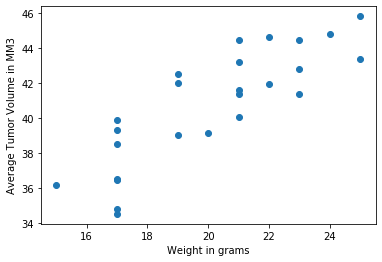

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table = Pymarceuticals_df.loc[Pymarceuticals_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight in grams')
plt.ylabel('Average Tumor Volume in MM3')
plt.show()

Capomulin correlation: mouse weight and average tumor volume 0.84


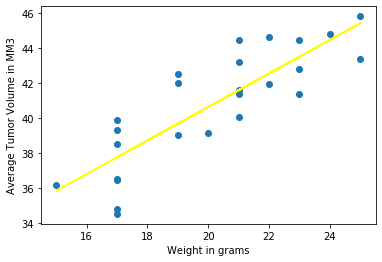

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"Capomulin correlation: mouse weight and average tumor volume {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="yellow")
plt.xlabel('Weight in grams')
plt.ylabel('Average Tumor Volume in MM3')
plt.show()